In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from emnist import list_datasets, extract_training_samples,extract_test_samples
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'  

2024-03-01 09:41:46.234275: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 09:41:46.272508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 09:41:46.272546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 09:41:46.273373: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 09:41:46.280807: I tensorflow/core/platform/cpu_feature_guar

In [3]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
train_images, train_labels = extract_training_samples('letters')

In [5]:
train_images.shape, train_labels.shape

((124800, 28, 28), (124800,))

In [6]:
test_images, test_labels = extract_test_samples('letters')

In [7]:
test_images.shape, test_labels.shape

((20800, 28, 28), (20800,))

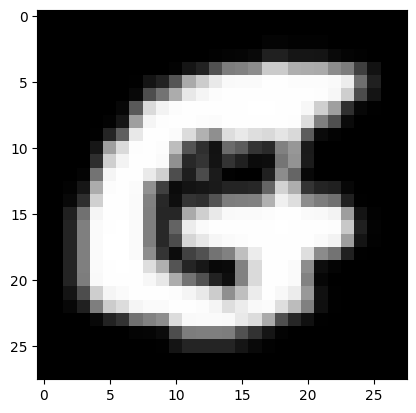

In [8]:
plt.plot()
plt.imshow((train_images[1]), cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
#training_labels
y1 = np.array(train_labels)
x1 = np.array(train_images)
#testing_labels
y2 = np.array(test_labels)
x2 = np.array(test_images)
print(y1.shape)
print(x1.shape)

(124800,)
(124800, 28, 28)


In [10]:
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [11]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [12]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [13]:
# # Convert labels to one-hot encoding
# train_labels_encoded = tf.keras.utils.to_categorical(train_labels, number_of_classes)
# test_labels_encoded = tf.keras.utils.to_categorical(test_labels, number_of_classes)

# # Define the model
# model = models.Sequential([
#     layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D(2, 2),
#     layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(2, 2),
#     layers.Flatten(),
#     layers.Dense(number_of_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded))

# # Evaluate the model
# test_loss, test_acc = model.evaluate(test_images, test_labels_encoded)
# print('Précision du modèle sur les données de test:', test_acc)



2024-03-01 09:41:50.437120: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (100)


Epoch 1/10
3900/3900 [==============================] - 63s 16ms/step - loss: 0.4259 - accuracy: 0.8676 - val_loss: 0.2785 - val_accuracy: 0.9137
Epoch 2/10
3900/3900 [==============================] - 60s 15ms/step - loss: 0.2478 - accuracy: 0.9201 - val_loss: 0.2492 - val_accuracy: 0.9217
Epoch 3/10
3900/3900 [==============================] - 56s 14ms/step - loss: 0.2205 - accuracy: 0.9285 - val_loss: 0.2410 - val_accuracy: 0.9226
Epoch 4/10
3900/3900 [==============================] - 61s 16ms/step - loss: 0.2052 - accuracy: 0.9338 - val_loss: 0.2330 - val_accuracy: 0.9268
Epoch 5/10
3900/3900 [==============================] - 65s 17ms/step - loss: 0.1962 - accuracy: 0.9364 - val_loss: 0.2279 - val_accuracy: 0.9287
Epoch 6/10
3900/3900 [==============================] - 80s 21ms/step - loss: 0.1890 - accuracy: 0.9382 - val_loss: 0.2337 - val_accuracy: 0.9278
Epoch 7/10
3900/3900 [==============================] - 72s 18ms/step - loss: 0.1830 - accuracy: 0.9399 - val_loss: 0.2239 -

In [14]:
# model.save('mnist_lettre.keras')

In [17]:
# Convert labels to one-hot encoding
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, number_of_classes)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, number_of_classes)

In [18]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(number_of_classes, activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
model.fit(train_images, train_labels_encoded, epochs=1, validation_data=(test_images, test_labels_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded)
print('Précision du modèle sur les données de test:', test_acc)

650/650 [==============================] - 3s 5ms/step - loss: 0.3761 - accuracy: 0.8866
Précision du modèle sur les données de test: 0.8865865468978882
